# Project-1: Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Columns Description:
    
    1.PassengerId: Passenger Id
    2.Survived: 0-Not Survived
                1-Survived
    3.Pclass: Passenger Class
              1-Class 1
              2.Class-2
              3.Class-3
    4.Name: Passenger Name
    5.Sex: Passenger Gender(Male, Female)
    6.Age: Passenger Age
    7.SibSp: Number of Siblings/Spouses Aboard
    8.Parch: Number of Parents/Children Aboard
    9.Ticket: Ticket Number
    10.Fare: Ticket Fare
    11.Cabin: Cabin Number
    12.Embarked: Port of Embarkation
                 1.C = Cherbourg
                 2.Q = Queenstown
                 3.S = Southampton

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA

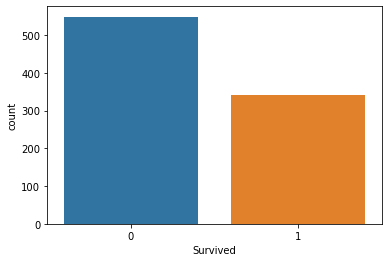

In [5]:
sns.countplot(df['Survived'])

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

    342--passengers survived 

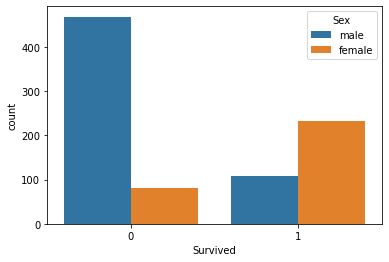

In [7]:
sns.countplot(df['Survived'],hue=df['Sex'])

    -Majority of women survived
    -Majority of men didn't survived

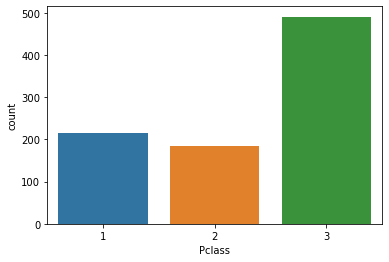

In [8]:
sns.countplot(df['Pclass'])

    Majority of passengers are in Class-3

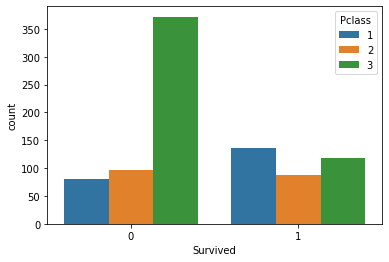

In [9]:
sns.countplot(df['Survived'],hue=df['Pclass'])

    Majority of Class-3 passengers didn't survived

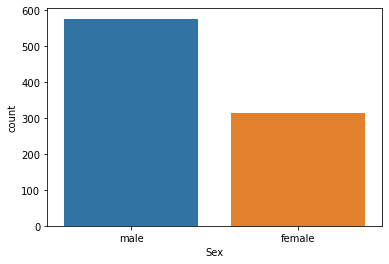

In [10]:
sns.countplot(df['Sex'])

        Majority of passengers are Male

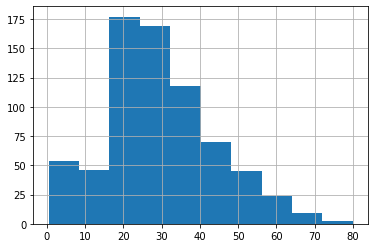

In [11]:
df['Age'].hist()

        Majority of passengers age is in b\w 18 & 32

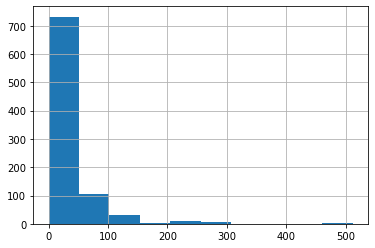

In [12]:
df['Fare'].hist()

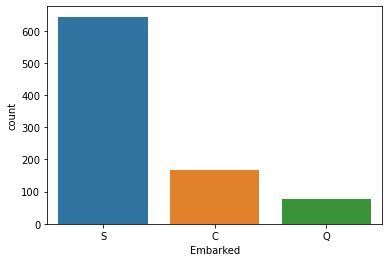

In [13]:
sns.countplot(df['Embarked'])

    Majority of passengers are from Southampton

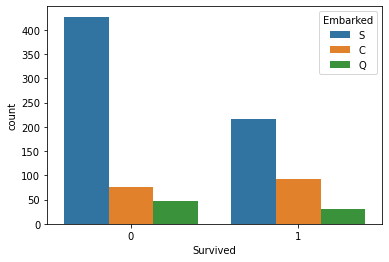

In [14]:
sns.countplot(df['Survived'],hue=df['Embarked'])

# Data Preparation

Columns such as PassengerId, Name, Ticket, are not necessary for survival prediction, hence delete these columns 

In [15]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

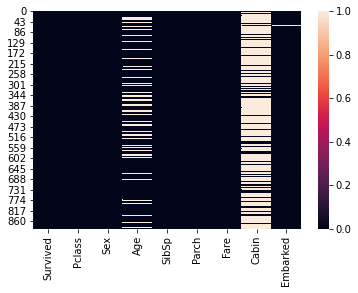

In [19]:
sns.heatmap(df.isnull())

    Since majority of passengers cabin number is missing, it is better to drop that column

In [20]:
df.drop('Cabin',axis=1,inplace=True)

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Handling the NaN values

In [22]:
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace=True)

In [23]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

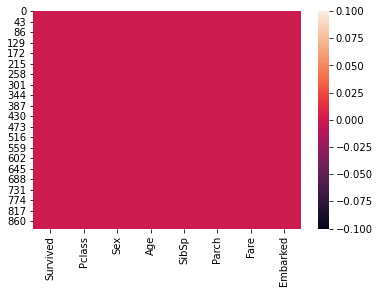

In [25]:
sns.heatmap(df.isnull())

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

    So 1--Male
       0--Female

In [29]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Embarked']=le.fit_transform(df['Embarked'])
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

    So 0--C
       1--Q
       2--S

# Checking Outliers

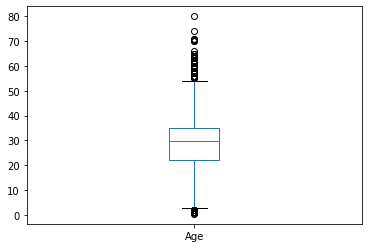

In [31]:
df['Age'].plot.box()

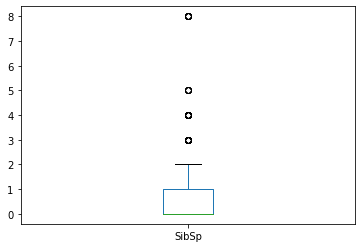

In [32]:
df['SibSp'].plot.box()

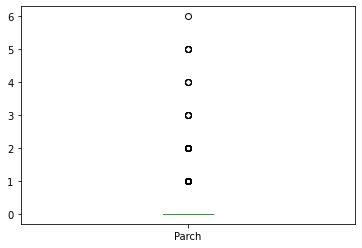

In [33]:
df['Parch'].plot.box()

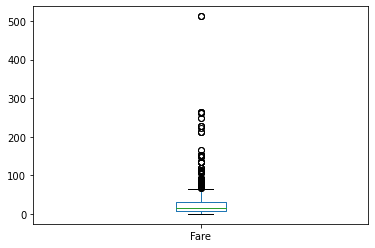

In [34]:
df['Fare'].plot.box()

    From above boxplot figures it is sure that outliers exist

Removing Outliers

1.Z-score Method

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [36]:
# threshold = 3
td=df[(z<3).all(axis=1)]

In [37]:
td.shape

(820, 8)

In [38]:
df.shape

(891, 8)

In [39]:
# percentage loss of data
per_loss=((891-820)/891)*100
per_loss

7.968574635241302

2.IQR Method

In [40]:
Q3=df.quantile(.75)
Q1=df.quantile(.25)
IQR=Q3-Q1
IQR

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64

In [41]:
td1=df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
td1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
884,0,3,1,25.000000,0,0,7.0500,2
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
889,1,1,1,26.000000,0,0,30.0000,0


In [42]:
td1.shape

(577, 8)

In [43]:
per_loss=((891-577)/891)*100
per_loss

35.24130190796858

    Since percentage loss of data after removing outlier is maximum in IQR method, it is better to prefer z-score method 

# Checking Skewness

In [44]:
td.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

    Acceptable range of skewness is -0.5 to +0.5, hence skewness exists.

In [45]:
x=td.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [46]:
y=td.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

Removing Skewness

In [47]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# finding the best random_state

acc=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    if acc_score>acc:
        acc=acc_score
        best_random_state=i
        
        
print(f"Best Accuarcy_score is {acc_score*100} for random_state {best_random_state}" )

Best Accuarcy_score is 82.4390243902439 for random_state 14


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=14)

In [52]:
# finding the best cv
from sklearn.model_selection import cross_val_score

cv=0
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f"Best cross_val_score is {cv_score*100} for cv={best_cv}")

Best cross_val_score is 79.14609545044327 for cv=8


# 1. Logistic Regression

In [53]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(lr,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 86.82926829268293
cross_val_score: 79.5128973919665
Difference: 7.316370900716429


[[107   9]
 [ 18  71]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       116
           1       0.89      0.80      0.84        89

    accuracy                           0.87       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.87      0.87       205



# 2. Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(dtc,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 81.46341463414633
cross_val_score: 77.44979059584999
Difference: 4.013624038296348


[[96 20]
 [18 71]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       116
           1       0.78      0.80      0.79        89

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



# 3. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(rfc,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 85.85365853658537
cross_val_score: 80.12683228631259
Difference: 5.726826250272776


[[103  13]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       116
           1       0.85      0.82      0.83        89

    accuracy                           0.86       205
   macro avg       0.86      0.85      0.86       205
weighted avg       0.86      0.86      0.86       205



# 4. Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(gnb,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 84.39024390243902
cross_val_score: 78.05896630496859
Difference: 6.3312775974704305


[[103  13]
 [ 19  70]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       116
           1       0.84      0.79      0.81        89

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



# 5. Support Vector Classifier

In [57]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(svc,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 85.85365853658537
cross_val_score: 80.73362840281743
Difference: 5.120030133767928


[[112   4]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       116
           1       0.94      0.72      0.82        89

    accuracy                           0.86       205
   macro avg       0.88      0.84      0.85       205
weighted avg       0.87      0.86      0.85       205



# 6. K Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(knc,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 84.8780487804878
cross_val_score: 81.46654292785075
Difference: 3.4115058526370534


[[107   9]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       116
           1       0.88      0.75      0.81        89

    accuracy                           0.85       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.85      0.85      0.85       205



    From above, it is clear that all models have an Accuracy Score in the range of 80%-85%.
    Lets select 'Random forest Classifier' for hyperparameter tuning.

In [59]:
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators':[100,120,140,160],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'class_weight':['balanced','balanced_subsample']
           }

In [60]:
gscv=GridSearchCV(rfc,parameters,scoring='accuracy',cv=8)
gscv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 120, 140, 160]},
             scoring='accuracy')

In [61]:
gscv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 160}

In [62]:
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='auto',class_weight='balanced_subsample')
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy score:',a*100)
cv_score=cross_val_score(rfc,x,y,cv=8).mean()
print('cross_val_score:',cv_score*100)
print('Difference:',(a-cv_score)*100)
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 85.85365853658537
cross_val_score: 80.86331620026651
Difference: 4.990342336318854


[[105  11]
 [ 18  71]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       116
           1       0.87      0.80      0.83        89

    accuracy                           0.86       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.86      0.86       205



# ROC Curve

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score

In [64]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [65]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

Text(0.5, 1.0, 'Random Forest Classifier')

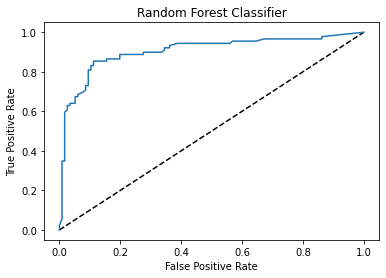

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')

In [67]:
ra_score=roc_auc_score(y_test,y_pred)

In [68]:
ra_score*100

85.14626113909337

Conclusion

In [69]:
df1=pd.DataFrame({'Survived':y_test,'Model_Prediction':y_pred})
df1

,Survived,Model_Prediction
488,0,0
217,0,0
359,1,1
290,1,1
513,1,1
...,...,...
321,0,0
80,0,0
289,1,1
183,1,1


    From above table it is clear that the model is predicting values with 80%-85% accuarcy.

In [70]:
import joblib

joblib.dump(rfc,'Titanic_Model.obj')

['Titanic_Model.obj']